# KIVA - HOW CAN WE HELP YOU TO BECOME A BETTER DATASET? 

### Dropping empty rows is no longer our #1 choice. Let's see how can our team patch up KIVA dataset base on our understanding and get it ready for the visualization & analytics parts later on. 

#### Structure: 
1. First observations
2. Understanding Kiva workflow 
3. Data cleansing
4. Data visualisation

# I. First observation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('kiva_loans.csv')

In [3]:
data.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [5]:
data.shape

(671205, 20)

In [6]:
data.describe(include='all')

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
count,6.712050e+05,671205.000000,671205.000000,671205,671205,666973,671197,671205,614405,671205,657698.000000,671205,668809,622874,671205.000000,671205.000000,499789,666984,671205,671205
unique,NaN,NaN,NaN,163,15,424912,86,87,12695,67,NaN,667399,5719,498007,NaN,NaN,86719,11298,4,1298
top,NaN,NaN,NaN,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,NaN,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,NaN,NaN,user_favorite,female,monthly,2017-03-20
freq,NaN,NaN,NaN,72955,180302,5217,160441,160441,10000,160440,NaN,25,2800,33,NaN,NaN,27088,426502,342717,1308
mean,9.932486e+05,785.995061,842.397107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.199616,NaN,NaN,NaN,13.739022,20.590922,NaN,NaN,NaN,NaN
std,1.966113e+05,1130.398941,1198.660073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.247581,NaN,NaN,NaN,8.598919,28.459551,NaN,NaN,NaN,NaN
min,6.530470e+05,0.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,8.230720e+05,250.000000,275.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.000000,NaN,NaN,NaN,8.000000,7.000000,NaN,NaN,NaN,NaN
50%,9.927800e+05,450.000000,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000000,NaN,NaN,NaN,13.000000,13.000000,NaN,NaN,NaN,NaN
75%,1.163653e+06,900.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.000000,NaN,NaN,NaN,14.000000,24.000000,NaN,NaN,NaN,NaN


In [7]:
# Check duplicated row
duplicate = data[data.duplicated()]
duplicate.shape

(0, 20)

Ok, không có dòng nào bị duplicate. 

In [8]:
data.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [9]:
# Check missing values of each columns
data.isnull().sum().sort_values(ascending=False)

tags                  171416
region                 56800
funded_time            48331
partner_id             13507
use                     4232
borrower_genders        4221
disbursed_time          2396
country_code               8
date                       0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
currency                   0
country                    0
repayment_interval         0
posted_time                0
term_in_months             0
lender_count               0
id                         0
dtype: int64

In [10]:
# Observe each columns to see what's the problem of missing value there:

In [11]:
# 1. Tags column
data['tags'].nunique()

86719

In [12]:
data['tags'].head(10)

0                             NaN
1                             NaN
2    user_favorite, user_favorite
3                             NaN
4                             NaN
5                             NaN
6    user_favorite, user_favorite
7      #Elderly, #Woman Owned Biz
8                   user_favorite
9                             NaN
Name: tags, dtype: object

#### Obv1:
- Tags là cột optional, người sử dụng tự nghĩ ra tags (giống hashtag) để type vào. Là cột thiếu nhiều nhất nhưng ko quan trọng vì có thể xác định chéo bằng các cột khác như sector/activity/use. 
- Use: same as Tags

In [13]:
#2. Country_code column: 
data[data['country_code'].isnull()]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
202537,851360,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,437.0,2015-03-05 20:23:50+00:00,2015-06-03 07:00:00+00:00,2015-03-25 15:10:03+00:00,6.0,162,"user_favorite, user_favorite",female,bullet,2015-03-05
202823,851368,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,NAD,437.0,2015-03-05 20:56:01+00:00,2015-06-03 07:00:00+00:00,2015-03-25 15:48:31+00:00,6.0,159,user_favorite,male,bullet,2015-03-05
344929,991853,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,437.0,2015-12-08 19:08:18+00:00,2016-01-05 08:00:00+00:00,2015-12-22 03:53:32+00:00,7.0,120,user_favorite,female,bullet,2015-12-08
351177,998555,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,NAD,437.0,2015-12-21 19:59:37+00:00,2016-01-05 08:00:00+00:00,2015-12-22 05:58:09+00:00,7.0,126,NaN,male,bullet,2015-12-21
420953,1068167,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,437.0,2016-05-12 21:33:33+00:00,2016-06-10 07:00:00+00:00,2016-05-15 20:27:57+00:00,7.0,118,"#Repeat Borrower, user_favorite, user_favorite...",female,bullet,2016-05-12
421218,1068159,4000.0,4000.0,Wholesale,Wholesale,purchase solar lighting products for sale to l...,NaN,Namibia,Rundu,NAD,437.0,2016-05-12 21:19:41+00:00,2016-06-10 07:00:00+00:00,2016-05-15 17:36:49+00:00,7.0,150,"#Eco-friendly, #Repeat Borrower, #Technology, ...",male,bullet,2016-05-12
487207,1147852,5100.0,5100.0,Renewable Energy Products,Retail,to pay for stock of solar lights and cell phon...,NaN,Namibia,Katima Mulilo,NAD,437.0,2016-09-08 22:12:16+00:00,2016-10-01 07:00:00+00:00,2016-10-03 21:56:37+00:00,7.0,183,"#Eco-friendly, #Technology, user_favorite, use...",male,bullet,2016-09-08
487653,1147866,5000.0,5000.0,Wholesale,Wholesale,to maintain a stock of solar lights and cell p...,NaN,Namibia,Oshakati,NAD,437.0,2016-09-08 22:30:43+00:00,2016-10-01 07:00:00+00:00,2016-09-19 06:32:16+00:00,7.0,183,"#Eco-friendly, #Technology, user_favorite, use...",female,bullet,2016-09-08


#### Obv2: 
- Country_code: Namibia actually has its country code as NA (2 digits, or NAM - 3digits) so pandas reads it wrong. The country_code column is fine, we just need to replace it as NAM for a less-confuse understanding. 

In [14]:
# Gender column: 
data['borrower_genders'].nunique()

11298

In [15]:
data['borrower_genders'].head(5)

0            female
1    female, female
2            female
3            female
4            female
Name: borrower_genders, dtype: object

In [16]:
data['borrower_genders'].sort_values(ascending=False).head()

270567    male, male, male, male, male, male, male, male...
514023    male, male, male, male, male, male, male, male...
121510    male, male, male, male, male, male, male, male...
117813    male, male, male, male, male, male, male, male...
519579    male, male, male, male, male, male, male, male...
Name: borrower_genders, dtype: object

#### Obv: 
- So the problem here is a business project can belong to a single individual or a groupe of single gender or mixed gender, and the column tried to record gender of the whole group that's why gender column has a large unique value.  

In [17]:
#funded_time (48k missing), disbursed_time (2k missing)

In [18]:
#region (56k missing)

# II. Understanding Kiva workflow 

- Step 1. A borrower applies for a loan (Kiva loans are facilitated through two models, partner and direct, that enable us to reach the greatest number of people around the world.For partner loans, borrowers apply to a local Field Partner, which manages the loan on the ground. For direct loans, borrowers apply through the Kiva website) 

- Step 2. The loan goes through the underwriting and approval process.

- Step 3. The loan is posted to Kiva for lenders to support as a Fundraising project. Lenders crowdfund the loan in increments of $25 or more.

Usually, loans on Kiva have 30 days to successfully fundraise. But in most cases, if a loan doesn’t fully fund on Kiva the individual borrower is not directly affected. That’s because most of Kiva’s Field Partners give borrowers access to credit before posting their loans on the Kiva website ("pre-disbursal"), so the borrower can use the funds immediately.

If the loan successfully funds on Kiva, the crowdfunded money is used to backfill the loan amount, and when the borrower makes repayments they're passed along to the specific Kiva lenders who supported the loan. If a loan doesn’t fully fund (or reach 100%) when it’s posted on Kiva, lenders who did contribute receive their money back in their Kiva accounts and the Field Partner uses its own reserves to pay for the loan.

In [19]:
# Since the credit involve, let's check the current balance of Kiva:
delta_amount_calc = lambda row: row['funded_amount'] - row['loan_amount']
data['delta_amount'] = data.apply(func = delta_amount_calc, axis = 1) 

In [20]:
data['delta_amount'].describe(percentiles=[.8,.9,.999999])

count       671205.000000
mean           -56.402046
std            391.901150
min         -50000.000000
50%              0.000000
80%              0.000000
90%              0.000000
99.9999%       148.298500
max            400.000000
Name: delta_amount, dtype: float64

In [21]:
data['delta_amount'].sum()

-37857335.0

In [22]:
data[data['delta_amount'] != 0][['delta_amount','activity', 'sector', 'funded_amount', 'loan_amount', 'country']].head()

,delta_amount,activity,sector,funded_amount,loan_amount,country
87,-725.0,Personal Housing Expenses,Housing,4275.0,5000.0,Palestine
112,-475.0,Electronics Repair,Services,1925.0,2400.0,Iraq
186,-375.0,Grocery Store,Food,2625.0,3000.0,Iraq
309,-250.0,Grocery Store,Food,2750.0,3000.0,Iraq
313,-1700.0,Clothing,Clothing,1300.0,3000.0,Palestine


#### Obs: 
- Kiva balance is - 37.857.335 $ mean that the there are quite a number of project hadn't been fully funded by the community & they are having to use a large amount of Partner's credit to backfill it up.

# III. Data cleansing

In [23]:
#1. Correcting values: Country_code column for Namibia 

country_code_by_country = {'Namibia': 'NA'}
replace_country_code = lambda row: country_code_by_country[row['country']] if pd.isnull(row['country_code']) else row['country_code']  
data['country_code'] = data.apply(axis=1, func=replace_country_code)

In [24]:
#2. Standardizing values: Gender column - group by 4 groups: single woman, single man, all woman, mixed gender.
# We chose to specifize female gender since Empowered woman is an important index nows adays. 





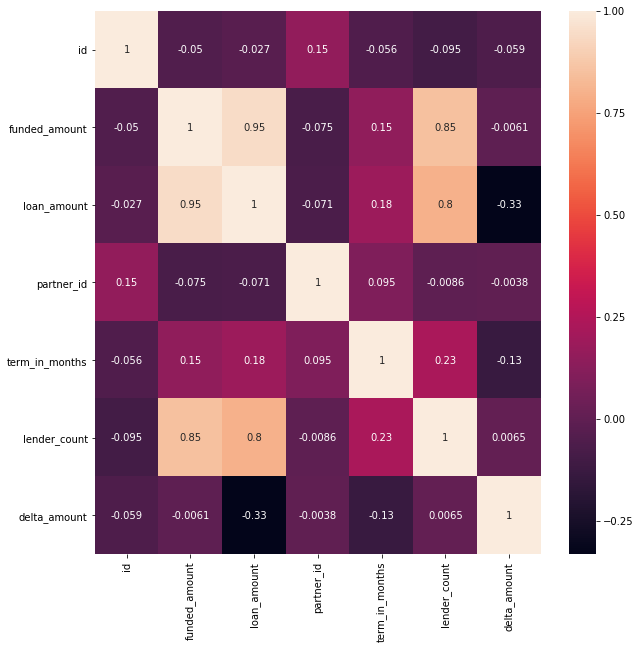

In [25]:
#3. Fill in funded_time & disbursed_time: 
# Since "posted_time" is fully recorded, we think we can base on this column to fill in the others columns
# We have 2 assumptions: the processing time can be either depending on SECTOR or COUNTRY
# So we gonna use heatmap to see which factor affect and decided how to continue. 

correlation=data.corr()
plt.figure(figsize=(10,10))
sns.set_context(font_scale=2)
sns.heatmap(correlation, annot=True,)
plt.show()
#--> hmm chua duoc, vi time chua dc xu ly thanh numerical values nen heatmap ko plot len duoc.

#### Hướng 2: 
- #### we only want to fill in "funded_time" column since this column is missing the most data (48k). If we can find an acceptable way to fill in the "disbursed_time" then we will do, otherwise we will just remove "disbursed_time" since the missing number is very small (2k vs 671k).
- #### We then gonna find out the "average_processing_time", then plot it up to see if "Sector" or "Country" or any other factors affect the trends of this new values, then choose how we want to fill it. 

In [26]:
data['Processing_time']=np.nan






# IV. Data visualization

female    1071308
male       274904
dtype: int64


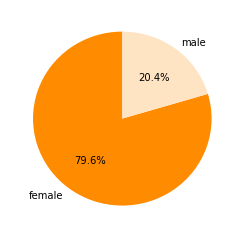

In [28]:
#1. Total Man vs Total Woman borrowers in Kiva: 
gender_list = []
for gender in data["borrower_genders"].values:
   if str(gender) != "nan":
       gender_list.extend( [lst.strip() for lst in gender.split(",")] )
gender_count = pd.Series(gender_list).value_counts()
print(gender_count)
labels = (np.array(gender_count.index))
sizes = (np.array((gender_count/gender_count.sum())*100))
plt.figure(figsize=(4,4))
colors = ['darkorange', 'bisque']
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.show()

In [ ]:
#2. 